In [1]:
from utility import *

ModuleNotFoundError: No module named 'skimage'

In [2]:
f = nano.read_file('/Users/hunfen/OneDrive/General Files/ゼミー/20210401/2021-03-12/' + 'Bias-Spectroscopy' + '{}'.format(28).zfill(5) + '.dat')
bias = f.data[:, 0]
I_fwd = f.data[:, 1]
I_bwd = f.data[:, 4]
fwd = f.data[:, 2]
bwd = f.data[:, 5]

In [3]:
bias_correct = bias - 7e-3

In [4]:
def dynes_func(bias, delta, Gamma):
    return np.abs((np.abs(bias) - 1j * Gamma) / np.sqrt((bias - 1j * Gamma) ** 2 - delta ** 2))

def fermi_dirac(E, T = 5.1):
    k_B = 8.617333262145e-5
    return 1 / (np.exp(E / (k_B * T))+ 1)

def D_fermi_dirac(E, bias = 0,T = 5.1):
    k_B = 8.617333262145e-5
    return 1 / ((k_B * T) * np.cosh((E - bias) / 2 / (k_B * T)) ** 2)

def intergrand(E, args):
    bias, delta, Gamma = args
    return dynes_func(E, delta, Gamma) * D_fermi_dirac(E, bias)

# def didv(bias, ):



In [5]:
gap = dynes_func(bias_correct, 15e-3, 3e-3)
DFD = D_fermi_dirac(bias_correct, T = 5.1)
norm_DFD = DFD / DFD.max()

In [25]:
FD_kernel = np.zeros((401, 401))

In [27]:
for i in range(len(bias_correct)):
     FD_kernel[i] = D_fermi_dirac(bias_correct, bias_correct[i], T = 5.1)


In [42]:
deconvolved = np.zeros(401)
for i in range(401):
   a, b = deconvolve(fwd, FD_kernel[i])
   deconvolved[i] = a

In [48]:
phi_0 = 2.07e-15
a_min = 5e-9

b_max = phi_0 / (np.sqrt(3) / 2 * (a_min ** 2))

In [66]:
2.07e-15 / (2 * np.pi * (5e-9 / 100) **2)

131780.29288008934

In [8]:
# a = convolve(gap, norm_DFD, 'same')
a = np.convolve(gap, norm_DFD, 'same')


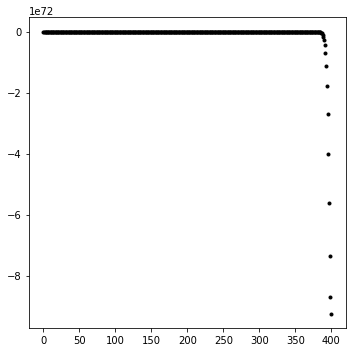

In [46]:
row = 1
col = 1
fig, ax = plt.subplots(row, col, figsize = (col * 5, row * 5))

# ax.plot(bias_correct, dynes_func(bias_correct, 15e-3, 3e-3), '-', color = 'red')
# ax.plot(bias_correct, norm_DFD, '-', color = 'orange')
ax.plot(b, '.', color = 'black')

fig.tight_layout();